In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Categorical Features encoding
from sklearn.preprocessing import OrdinalEncoder , OneHotEncoder ,  LabelEncoder

# Feature scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import  minmax_scale
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

# Pipline
from sklearn.base import BaseEstimator , TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.multioutput import RegressorChain

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Ensempling models
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier,VotingClassifier,HistGradientBoostingClassifier


# Loss function 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Model tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_path = "/content/drive/MyDrive/final_proj/train.csv"
test_path = "/content/drive/MyDrive/final_proj/test.csv"
train_df = pd.DataFrame(pd.read_csv(train_path))
test_df = pd.DataFrame(pd.read_csv(test_path))

In [ ]:
train_df.drop("id",axis = 1,inplace = True)
test_df.drop("id",axis = 1,inplace = True)

In [ ]:
print("Train columns: ",len(train_df.columns))
print("Test columns: ",len(test_df.columns))

Train columns:  17
Test columns:  16


In [ ]:
train_df = train_df.drop_duplicates()

In [ ]:
#train_df = train_df[(train_df["Class"]==10) | (train_df["Class"]==6) |(train_df["Class"]==8)]
class_ = train_df["Class"].copy()
#train_df["Class"].iloc[(train_df["Class"] != 10)]=0
#train_df["Class"].iloc[(train_df["Class"] == 10)]=1

In [ ]:
class_

0         3
1         5
2         6
3         9
4         1
         ..
14391     7
14392    10
14393     9
14394     9
14395    10
Name: Class, Length: 14396, dtype: int64

In [ ]:
train_df["Class"].value_counts()

10    3959
6     2069
9     2019
8     1483
5     1157
1     1098
2     1018
0      500
7      461
3      322
4      310
Name: Class, dtype: int64

In [ ]:
train_df

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,"Lata Mangeshkar, Hariharan",Likha Hai Yeh,23.00,0.37,0.67,7.00,-11.01,0,0.04,0.81,0.00,0.24,0.80,177.16,5.21,3,3
1,Kalan.FrFr,No Love ft. Mozzy & Cypress Moreno,45.00,0.66,0.64,6.00,-8.14,1,0.39,0.42,NaN,0.12,0.69,99.52,206602.00,4,5
2,The Cure,Play For Today,51.00,0.46,0.73,11.00,-12.05,0,0.14,0.05,0.02,0.12,0.78,80.42,218960.00,4,6
3,Miguel Poveda,Coplas Del Querer,40.00,0.51,0.29,5.00,-8.90,0,0.05,0.83,NaN,0.10,0.32,96.14,332467.00,3,9
4,Leif Vollebekk,Long Blue Light,63.00,0.55,0.48,9.00,-9.11,1,0.03,0.52,0.11,0.16,0.51,71.55,200173.00,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14391,"Ólafur Arnalds, Alice Sara Ott",Verses,42.00,0.14,0.16,1.00,-17.84,0,0.04,0.87,0.92,0.39,0.03,142.24,4.05,3,7
14392,Citizen Cope,Something to Believe In,50.00,0.66,0.88,5.00,-7.04,1,0.05,0.05,0.01,0.09,0.88,156.10,221840.00,4,10
14393,WurlD,WAYO (KPE LE WU),41.00,0.70,0.54,4.00,-8.05,0,0.15,0.42,0.00,0.11,0.66,91.94,196093.00,4,9
14394,Rafferty,Making a Home,48.00,0.41,0.57,11.00,-6.01,1,0.04,0.30,NaN,0.24,0.47,159.70,238173.00,4,9


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14396 entries, 0 to 14395
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         14396 non-null  object 
 1   Track Name          14396 non-null  object 
 2   Popularity          14045 non-null  float64
 3   danceability        14396 non-null  float64
 4   energy              14396 non-null  float64
 5   key                 12784 non-null  float64
 6   loudness            14396 non-null  float64
 7   mode                14396 non-null  int64  
 8   speechiness         14396 non-null  float64
 9   acousticness        14396 non-null  float64
 10  instrumentalness    10837 non-null  float64
 11  liveness            14396 non-null  float64
 12  valence             14396 non-null  float64
 13  tempo               14396 non-null  float64
 14  duration_in min/ms  14396 non-null  float64
 15  time_signature      14396 non-null  int64  
 16  Clas

In [ ]:
train_df["Popularity"] = train_df["Popularity"] / 100
test_df["Popularity"] = test_df["Popularity"] / 100

In [ ]:
train_df = train_df.drop_duplicates()

In [ ]:
def artist_name_imputing_dic(data, artist_col = "Artist Name"):
  artist_col_ = list(train_df[artist_col].value_counts().index)
  length = len(artist_col_)
  label_list = {name:i for name , i in zip(artist_col_,range(length))}
  return label_list

In [ ]:
def artist_imputer(data, label_list, artist_col = "Artist Name"):
  list1 = list(data[artist_col])
  res = []
  for name in list1:
    if name in list(label_list.keys()):
      label = label_list[name]
    else:
      label = np.NaN
    res = res + [label]
  return pd.DataFrame(res)

In [ ]:
train_df = train_df.applymap(lambda x:x.lower() if type(x) == str else x)
test_df = test_df.applymap(lambda x:x.lower() if type(x) == str else x)

In [ ]:
label_list_ = artist_name_imputing_dic(data = train_df , artist_col = "Artist Name")

In [ ]:
train=artist_imputer(data = train_df, label_list=label_list_, artist_col = "Artist Name")
test=artist_imputer(data = test_df, label_list=label_list_, artist_col = "Artist Name")

In [ ]:
train_df.reset_index(inplace= True)

In [ ]:
train_df

,index,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,0,"lata mangeshkar, hariharan",likha hai yeh,0.23,0.37,0.67,7.00,-11.01,0,0.04,0.81,0.00,0.24,0.80,177.16,5.21,3,3
1,1,kalan.frfr,no love ft. mozzy & cypress moreno,0.45,0.66,0.64,6.00,-8.14,1,0.39,0.42,NaN,0.12,0.69,99.52,206602.00,4,5
2,2,the cure,play for today,0.51,0.46,0.73,11.00,-12.05,0,0.14,0.05,0.02,0.12,0.78,80.42,218960.00,4,6
3,3,miguel poveda,coplas del querer,0.40,0.51,0.29,5.00,-8.90,0,0.05,0.83,NaN,0.10,0.32,96.14,332467.00,3,9
4,4,leif vollebekk,long blue light,0.63,0.55,0.48,9.00,-9.11,1,0.03,0.52,0.11,0.16,0.51,71.55,200173.00,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14391,14391,"ólafur arnalds, alice sara ott",verses,0.42,0.14,0.16,1.00,-17.84,0,0.04,0.87,0.92,0.39,0.03,142.24,4.05,3,7
14392,14392,citizen cope,something to believe in,0.50,0.66,0.88,5.00,-7.04,1,0.05,0.05,0.01,0.09,0.88,156.10,221840.00,4,10
14393,14393,wurld,wayo (kpe le wu),0.41,0.70,0.54,4.00,-8.05,0,0.15,0.42,0.00,0.11,0.66,91.94,196093.00,4,9
14394,14394,rafferty,making a home,0.48,0.41,0.57,11.00,-6.01,1,0.04,0.30,NaN,0.24,0.47,159.70,238173.00,4,9


In [ ]:
train_df["Artist Name"] = train
test_df["Artist Name"] = test

In [ ]:
train_df.drop("index",axis=1,inplace= True)
train_df

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,3504,likha hai yeh,0.23,0.37,0.67,7.00,-11.01,0,0.04,0.81,0.00,0.24,0.80,177.16,5.21,3,3
1,715,no love ft. mozzy & cypress moreno,0.45,0.66,0.64,6.00,-8.14,1,0.39,0.42,NaN,0.12,0.69,99.52,206602.00,4,5
2,54,play for today,0.51,0.46,0.73,11.00,-12.05,0,0.14,0.05,0.02,0.12,0.78,80.42,218960.00,4,6
3,2504,coplas del querer,0.40,0.51,0.29,5.00,-8.90,0,0.05,0.83,NaN,0.10,0.32,96.14,332467.00,3,9
4,6023,long blue light,0.63,0.55,0.48,9.00,-9.11,1,0.03,0.52,0.11,0.16,0.51,71.55,200173.00,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14391,4026,verses,0.42,0.14,0.16,1.00,-17.84,0,0.04,0.87,0.92,0.39,0.03,142.24,4.05,3,7
14392,2009,something to believe in,0.50,0.66,0.88,5.00,-7.04,1,0.05,0.05,0.01,0.09,0.88,156.10,221840.00,4,10
14393,7887,wayo (kpe le wu),0.41,0.70,0.54,4.00,-8.05,0,0.15,0.42,0.00,0.11,0.66,91.94,196093.00,4,9
14394,2347,making a home,0.48,0.41,0.57,11.00,-6.01,1,0.04,0.30,NaN,0.24,0.47,159.70,238173.00,4,9


In [ ]:
train_df_ = train_df.drop(["Track Name"], axis = 1 )
test_df_ = test_df.drop(["Track Name"], axis = 1 )

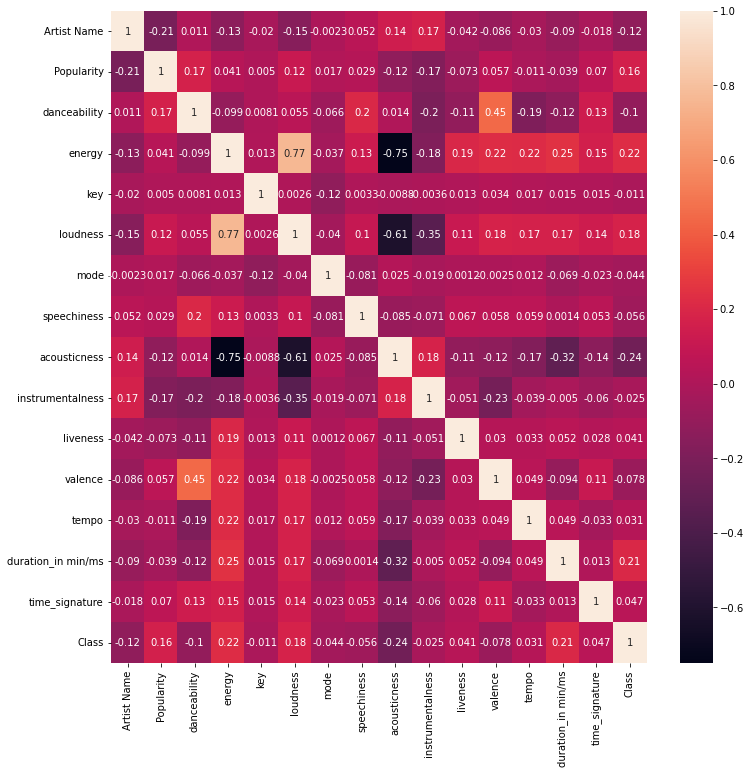

In [ ]:
corr = train_df_.corr(method='pearson')#'pearson', 'kendall', 'spearman'
plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True)
plt.show()

In [ ]:
x_ = train_df_.iloc[:,train_df_.columns != "Class"]
y_ = train_df_[["Class"]].copy()

In [ ]:
x_test = test_df_.iloc[:,test_df_.columns != "Class"]

In [ ]:
x_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         14396 non-null  int64  
 1   Popularity          14045 non-null  float64
 2   danceability        14396 non-null  float64
 3   energy              14396 non-null  float64
 4   key                 12784 non-null  float64
 5   loudness            14396 non-null  float64
 6   mode                14396 non-null  int64  
 7   speechiness         14396 non-null  float64
 8   acousticness        14396 non-null  float64
 9   instrumentalness    10837 non-null  float64
 10  liveness            14396 non-null  float64
 11  valence             14396 non-null  float64
 12  tempo               14396 non-null  float64
 13  duration_in min/ms  14396 non-null  float64
 14  time_signature      14396 non-null  int64  
dtypes: float64(12), int64(3)
memory usage: 1.6 MB


In [ ]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         2266 non-null   float64
 1   Popularity          3523 non-null   float64
 2   danceability        3600 non-null   float64
 3   energy              3600 non-null   float64
 4   key                 3198 non-null   float64
 5   loudness            3600 non-null   float64
 6   mode                3600 non-null   int64  
 7   speechiness         3600 non-null   float64
 8   acousticness        3600 non-null   float64
 9   instrumentalness    2782 non-null   float64
 10  liveness            3600 non-null   float64
 11  valence             3600 non-null   float64
 12  tempo               3600 non-null   float64
 13  duration_in min/ms  3600 non-null   float64
 14  time_signature      3600 non-null   int64  
dtypes: float64(13), int64(2)
memory usage: 422.0 KB


In [ ]:
x_.describe()

,Artist Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
count,14396.00,14045.00,14396.00,14396.00,12784.00,14396.00,14396.00,14396.00,14396.00,10837.00,14396.00,14396.00,14396.00,14396.00,14396.00
mean,2480.65,0.45,0.54,0.66,5.96,-7.90,0.64,0.08,0.25,0.18,0.20,0.49,122.73,200955.01,3.93
std,2382.36,0.17,0.17,0.24,3.19,4.06,0.48,0.08,0.31,0.30,0.16,0.24,29.56,111846.29,0.35
min,0.00,0.01,0.06,0.00,1.00,-39.95,0.00,0.02,0.00,0.00,0.01,0.02,34.13,0.53,1.00
25%,412.75,0.33,0.43,0.51,3.00,-9.53,0.00,0.03,0.00,0.00,0.10,0.30,99.80,166998.75,4.00
50%,1651.50,0.44,0.55,0.70,6.00,-7.01,1.00,0.05,0.08,0.00,0.13,0.48,120.07,209584.50,4.00
75%,4288.25,0.56,0.66,0.86,9.00,-5.16,1.00,0.08,0.43,0.20,0.26,0.67,141.99,252297.00,4.00
max,7887.00,1.00,0.99,1.00,11.00,1.35,1.00,0.95,1.00,1.00,1.00,0.99,217.42,1477187.00,5.00


In [ ]:
num_features = ["Popularity","danceability","energy","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo",'duration_in min/ms']
cat_features = ["Artist Name","mode",'key',"time_signature"]

In [ ]:
for i in cat_features:
    x_[i] = x_[i].fillna(x_[i].mode()[0])
for i in num_features:
    x_[i] = x_[i].fillna(x_[i].median())

In [ ]:
for i in cat_features:
    x_test[i] = x_test[i].fillna(x_test[i].mode()[0])
for i in num_features:
    x_test[i] = x_test[i].fillna(x_test[i].median())

In [ ]:
print("<<<<<<<<<<<<<<<<<<<<<<<<<<<<<key>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>\n")
print(x_["key"].value_counts())
print("<<<<<<<<<<<<<<<<<<<<<<<<<<<<<mode>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>\n")
print(x_["mode"].value_counts())
print("<<<<<<<<<<<<<<<<<<<<<<<<<<<<<time_signature>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>\n")
print(x_["time_signature"].value_counts())

<<<<<<<<<<<<<<<<<<<<<<<<<<<<<key>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

7.00     3296
2.00     1592
9.00     1578
1.00     1329
4.00     1236
11.00    1167
5.00     1125
6.00      948
8.00      899
10.00     814
3.00      412
Name: key, dtype: int64
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<mode>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

1    9193
0    5203
Name: mode, dtype: int64
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<time_signature>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

4    13200
3      953
5      159
1       84
Name: time_signature, dtype: int64


In [ ]:
print("<<<<<<<<<<<<<<<<<<<<<<<<<<<<<key>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>\n")
print(x_test["key"].value_counts())
print("<<<<<<<<<<<<<<<<<<<<<<<<<<<<<mode>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>\n")
print(x_test["mode"].value_counts())
print("<<<<<<<<<<<<<<<<<<<<<<<<<<<<<time_signature>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>\n")
print(x_test["time_signature"].value_counts())

<<<<<<<<<<<<<<<<<<<<<<<<<<<<<key>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

7.00     815
2.00     402
9.00     383
1.00     351
4.00     313
11.00    309
5.00     272
6.00     242
8.00     220
10.00    196
3.00      97
Name: key, dtype: int64
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<mode>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

1    2266
0    1334
Name: mode, dtype: int64
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<time_signature>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

4    3251
3     275
5      44
1      30
Name: time_signature, dtype: int64


In [ ]:
def func(x):
    if  x <= 0.5:
        return 0
    else:
        return 1
x_ ["cat_instrumentalness"] = x_["instrumentalness"].apply(func)
x_test ["cat_instrumentalness"] = x_test["instrumentalness"].apply(func)

In [ ]:
def func(x):
    if  x <= 0.8:
        return 0
    else:
        return 1
x_ ["cat_liveness"] = x_["liveness"].apply(func)
x_test ["cat_liveness"] = x_test["liveness"].apply(func)

In [ ]:
def func(x):
    if 0 <= x <= 0.33:
        return 0
    elif 0.33 < x <= 0.66:
        return 1
    return 2

x_ ["cat_speechiness"] = x_["speechiness"].apply(func)
x_test ["cat_speechiness"] = x_test["speechiness"].apply(func)

In [ ]:
x_["merge"] = (x_["danceability"] + x_["energy"] + x_["instrumentalness"] + x_["liveness"])/4
x_test["merge"] = (x_test["danceability"] + x_test["energy"] + x_test["instrumentalness"] + x_test["liveness"])/4

In [ ]:
num_features = ["Popularity","danceability","energy","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo",'duration_in min/ms',"merge"]
cat_features = ["Artist Name","mode",'key',"time_signature","cat_instrumentalness","cat_liveness","cat_speechiness"]

In [ ]:
x_

,Artist Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,cat_instrumentalness,cat_liveness,cat_speechiness,merge
0,3504,0.23,0.37,0.67,7.00,-11.01,0,0.04,0.81,0.00,0.24,0.80,177.16,5.21,3,0,0,0,0.32
1,715,0.45,0.66,0.64,6.00,-8.14,1,0.39,0.42,0.00,0.12,0.69,99.52,206602.00,4,0,0,1,0.35
2,54,0.51,0.46,0.73,11.00,-12.05,0,0.14,0.05,0.02,0.12,0.78,80.42,218960.00,4,0,0,0,0.33
3,2504,0.40,0.51,0.29,5.00,-8.90,0,0.05,0.83,0.00,0.10,0.32,96.14,332467.00,3,0,0,0,0.22
4,6023,0.63,0.55,0.48,9.00,-9.11,1,0.03,0.52,0.11,0.16,0.51,71.55,200173.00,4,0,0,0,0.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14391,4026,0.42,0.14,0.16,1.00,-17.84,0,0.04,0.87,0.92,0.39,0.03,142.24,4.05,3,1,0,0,0.40
14392,2009,0.50,0.66,0.88,5.00,-7.04,1,0.05,0.05,0.01,0.09,0.88,156.10,221840.00,4,0,0,0,0.41
14393,7887,0.41,0.70,0.54,4.00,-8.05,0,0.15,0.42,0.00,0.11,0.66,91.94,196093.00,4,0,0,0,0.33
14394,2347,0.48,0.41,0.57,11.00,-6.01,1,0.04,0.30,0.00,0.24,0.47,159.70,238173.00,4,0,0,0,0.31


In [ ]:
catkey = {7 : 0, 2 : 1, 9 : 2, 1 : 3, 4 : 4, 11 : 5, 5 : 6, 6 : 7, 8 : 8, 10 : 9, 3 : 10}
x_["key"] = x_["key"].apply(lambda i: catkey[i])
x_test["key"] = x_test["key"].apply(lambda i: catkey[i])
cattime_signature = {4 : 0, 3 : 1, 5 : 2, 1 : 3}
x_["time_signature"] = x_["time_signature"].apply(lambda i: cattime_signature[i])
x_test["time_signature"] = x_test["time_signature"].apply(lambda i: cattime_signature[i])

x_

,Artist Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,cat_instrumentalness,cat_liveness,cat_speechiness,merge
0,3504,0.23,0.37,0.67,0,-11.01,0,0.04,0.81,0.00,0.24,0.80,177.16,5.21,1,0,0,0,0.32
1,715,0.45,0.66,0.64,7,-8.14,1,0.39,0.42,0.00,0.12,0.69,99.52,206602.00,0,0,0,1,0.35
2,54,0.51,0.46,0.73,5,-12.05,0,0.14,0.05,0.02,0.12,0.78,80.42,218960.00,0,0,0,0,0.33
3,2504,0.40,0.51,0.29,6,-8.90,0,0.05,0.83,0.00,0.10,0.32,96.14,332467.00,1,0,0,0,0.22
4,6023,0.63,0.55,0.48,2,-9.11,1,0.03,0.52,0.11,0.16,0.51,71.55,200173.00,0,0,0,0,0.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14391,4026,0.42,0.14,0.16,3,-17.84,0,0.04,0.87,0.92,0.39,0.03,142.24,4.05,1,1,0,0,0.40
14392,2009,0.50,0.66,0.88,6,-7.04,1,0.05,0.05,0.01,0.09,0.88,156.10,221840.00,0,0,0,0,0.41
14393,7887,0.41,0.70,0.54,4,-8.05,0,0.15,0.42,0.00,0.11,0.66,91.94,196093.00,0,0,0,0,0.33
14394,2347,0.48,0.41,0.57,5,-6.01,1,0.04,0.30,0.00,0.24,0.47,159.70,238173.00,0,0,0,0,0.31


In [ ]:
x_[cat_features] = x_[cat_features]/x_[cat_features].max()
x_[cat_features]

,Artist Name,mode,key,time_signature,cat_instrumentalness,cat_liveness,cat_speechiness
0,0.44,0.00,0.00,0.33,0.00,0.00,0.00
1,0.09,1.00,0.70,0.00,0.00,0.00,0.50
2,0.01,0.00,0.50,0.00,0.00,0.00,0.00
3,0.32,0.00,0.60,0.33,0.00,0.00,0.00
4,0.76,1.00,0.20,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...
14391,0.51,0.00,0.30,0.33,1.00,0.00,0.00
14392,0.25,1.00,0.60,0.00,0.00,0.00,0.00
14393,1.00,0.00,0.40,0.00,0.00,0.00,0.00
14394,0.30,1.00,0.50,0.00,0.00,0.00,0.00


In [ ]:
x_test[cat_features] = x_test[cat_features]/x_test[cat_features].max()
x_test[cat_features]

,Artist Name,mode,key,time_signature,cat_instrumentalness,cat_liveness,cat_speechiness
0,0.02,1.00,0.40,0.00,0.00,0.00,0.00
1,0.00,1.00,0.40,0.00,0.00,0.00,0.00
2,0.00,1.00,0.20,0.00,0.00,0.00,0.00
3,0.76,1.00,0.30,0.00,0.00,0.00,0.00
4,0.00,1.00,0.50,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...
3595,0.00,1.00,0.10,0.00,0.00,0.00,0.00
3596,0.25,1.00,0.10,0.00,0.00,0.00,0.00
3597,0.10,1.00,0.90,0.00,0.00,0.00,0.00
3598,0.00,1.00,0.90,0.00,0.00,0.00,0.00


In [ ]:
x_.describe()

,Artist Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,cat_instrumentalness,cat_liveness,cat_speechiness,merge
count,14396.00,14396.00,14396.00,14396.00,14396.00,14396.00,14396.00,14396.00,14396.00,14396.00,14396.00,14396.00,14396.00,14396.00,14396.00,14396.00,14396.00,14396.00,14396.00
mean,0.31,0.45,0.54,0.66,0.36,-7.90,0.64,0.08,0.25,0.13,0.20,0.49,122.73,200955.01,0.04,0.13,0.01,0.01,0.38
std,0.30,0.17,0.17,0.24,0.31,4.06,0.48,0.08,0.31,0.27,0.16,0.24,29.56,111846.29,0.13,0.34,0.11,0.09,0.09
min,0.00,0.01,0.06,0.00,0.00,-39.95,0.00,0.02,0.00,0.00,0.01,0.02,34.13,0.53,0.00,0.00,0.00,0.00,0.07
25%,0.05,0.33,0.43,0.51,0.10,-9.53,0.00,0.03,0.00,0.00,0.10,0.30,99.80,166998.75,0.00,0.00,0.00,0.00,0.33
50%,0.21,0.44,0.55,0.70,0.30,-7.01,1.00,0.05,0.08,0.00,0.13,0.48,120.07,209584.50,0.00,0.00,0.00,0.00,0.38
75%,0.54,0.56,0.66,0.86,0.60,-5.16,1.00,0.08,0.43,0.05,0.26,0.67,141.99,252297.00,0.00,0.00,0.00,0.00,0.43
max,1.00,1.00,0.99,1.00,1.00,1.35,1.00,0.95,1.00,1.00,1.00,0.99,217.42,1477187.00,1.00,1.00,1.00,1.00,0.79


In [ ]:
Quantile_num_features = ["Artist Name","Popularity","danceability","energy","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo",'duration_in min/ms',"merge"]
skewed_scaler = QuantileTransformer(output_distribution='normal')
#x_[Quantile_num_features] = pd.DataFrame(skewed_scaler.fit_transform(x_[Quantile_num_features]), columns=Quantile_num_features)
#x_test[Quantile_num_features] = pd.DataFrame(skewed_scaler.fit_transform(x_test[Quantile_num_features]), columns=Quantile_num_features)

In [ ]:
norm_scaler = MinMaxScaler()
x_[Quantile_num_features] = pd.DataFrame(norm_scaler.fit_transform(x_[Quantile_num_features]), columns=Quantile_num_features)
x_test[Quantile_num_features] = pd.DataFrame(norm_scaler.fit_transform(x_test[Quantile_num_features]), columns=Quantile_num_features)

In [ ]:
def dest_plots (data,rows=3,cols=4,figsize=(20,20)):
  fig ,ax = plt.subplots(rows,cols,figsize=figsize)
  i = j = 0
  for col in list(data.columns):
    sns.distplot(data[col],ax=ax[j][i]);
    i = i + 1
    if i == cols:
      j = j + 1
      i = 0
  plt.show()

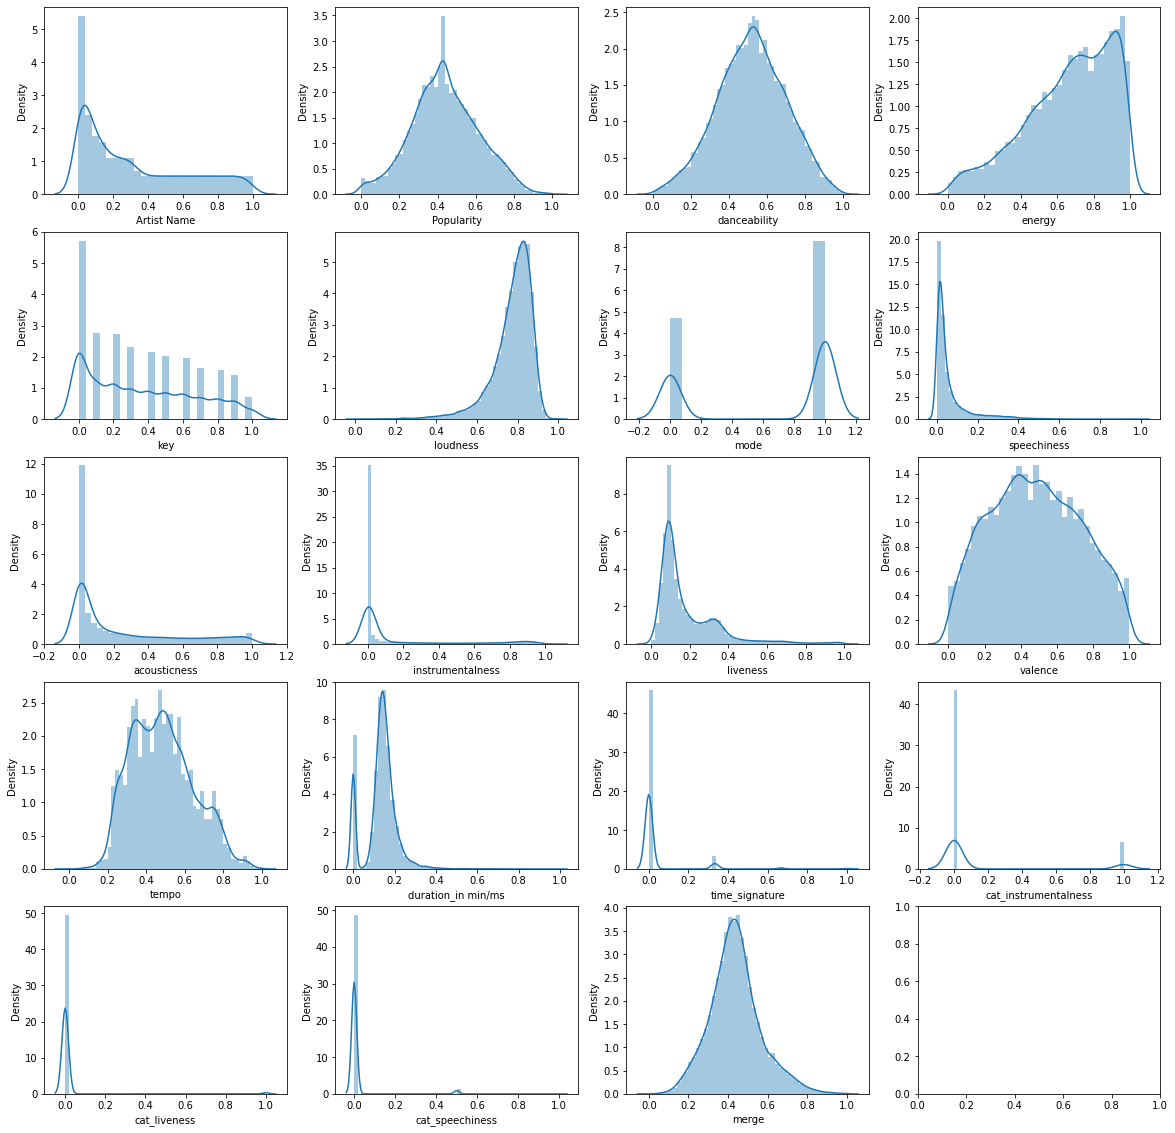

In [ ]:
dest_plots(data = x_, rows = 5 , cols = 4)

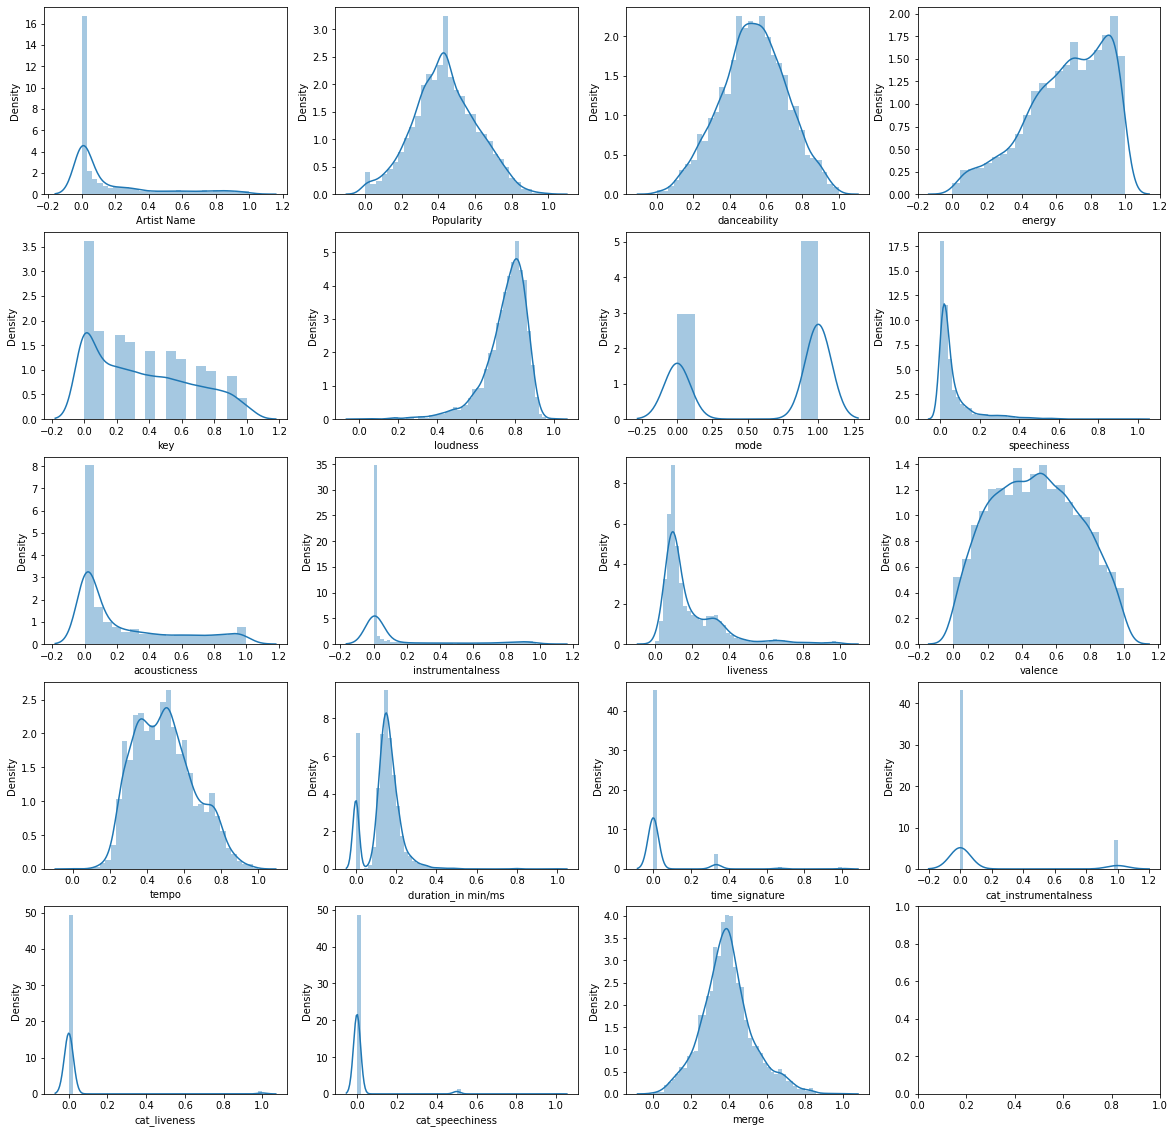

In [ ]:
dest_plots(data = x_test, rows = 5 , cols = 4)

# Features selection

This section is important to have a good knowledge about features contributions in the training process.

**Apply SelectKBest Algo**

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
orderd_rank_features = SelectKBest(score_func=chi2,k= 13)
orderd_features = orderd_rank_features.fit(x_,y_)

In [ ]:
dfscors = pd.DataFrame(orderd_features.scores_,columns=["score"])
dfcolumns = pd.DataFrame(x_.columns,columns=["features"])
features_rank = pd.concat([dfcolumns,dfscors], axis= 1)

In [ ]:
features_rank.nlargest(13,"score")

,features,score
15,cat_instrumentalness,2337.19
8,acousticness,1957.76
9,instrumentalness,1883.04
17,cat_speechiness,989.88
7,speechiness,572.50
3,energy,388.58
13,duration_in min/ms,274.50
11,valence,248.57
0,Artist Name,246.84
2,danceability,217.68


**Information Gain**

In [ ]:
from sklearn.feature_selection import mutual_info_classif

In [ ]:
mutual_info = mutual_info_classif(x_,y_)
mutual_data = pd.Series(mutual_info,index=x_.columns)
print(mutual_data.sort_values(ascending=False))

Artist Name            0.46
duration_in min/ms     0.36
acousticness           0.27
energy                 0.22
danceability           0.17
instrumentalness       0.16
speechiness            0.15
loudness               0.13
Popularity             0.11
valence                0.10
cat_instrumentalness   0.08
merge                  0.07
tempo                  0.07
liveness               0.04
cat_speechiness        0.03
time_signature         0.02
key                    0.01
mode                   0.01
cat_liveness           0.00
dtype: float64


**Features Importance based on Models**

In [ ]:
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model1 = ExtraTreesClassifier()
model2 = XGBClassifier(objective='reg:squarederror')
model1.fit(x_,y_)
model2.fit(x_,y_)

XGBClassifier(objective='multi:softprob')

In [ ]:
EXT_ranked_features = pd.Series(model1.feature_importances_,index=x_.columns)
XGB_ranked_features = pd.Series(model2.feature_importances_,index=x_.columns)

In [ ]:
EXT_ranked_features.nlargest(15)

duration_in min/ms   0.11
acousticness         0.09
speechiness          0.08
danceability         0.08
energy               0.08
Popularity           0.07
Artist Name          0.07
valence              0.07
instrumentalness     0.06
loudness             0.06
merge                0.05
liveness             0.05
tempo                0.05
key                  0.04
mode                 0.02
dtype: float64

In [ ]:
XGB_ranked_features.nlargest(15)

speechiness          0.14
duration_in min/ms   0.12
acousticness         0.12
energy               0.10
instrumentalness     0.08
danceability         0.08
Artist Name          0.06
loudness             0.06
valence              0.05
Popularity           0.05
merge                0.03
time_signature       0.03
mode                 0.03
tempo                0.02
liveness             0.02
dtype: float32

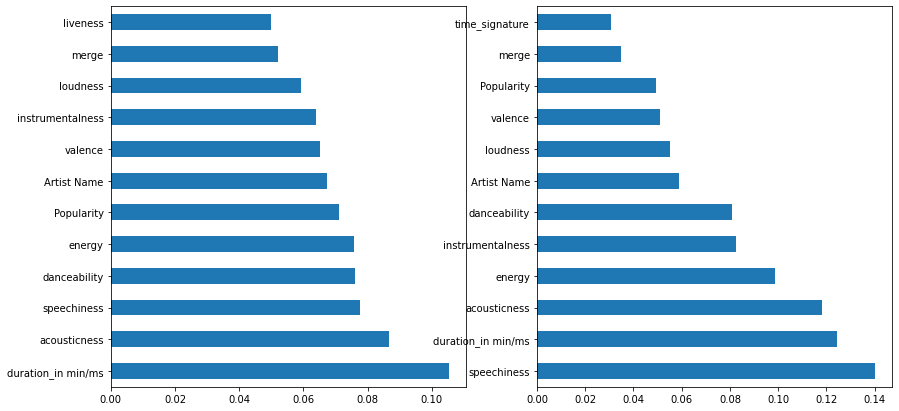

In [ ]:
fig ,ax = plt.subplots(1,2,figsize=(14,7))
EXT_ranked_features.nlargest(12).plot(kind = "barh", ax = ax[0])
XGB_ranked_features.nlargest(12).plot(kind = "barh", ax = ax[1])
plt.show()

**Linear correlation**

using pearson corroletion

In [ ]:
x_ ["class"] = y_

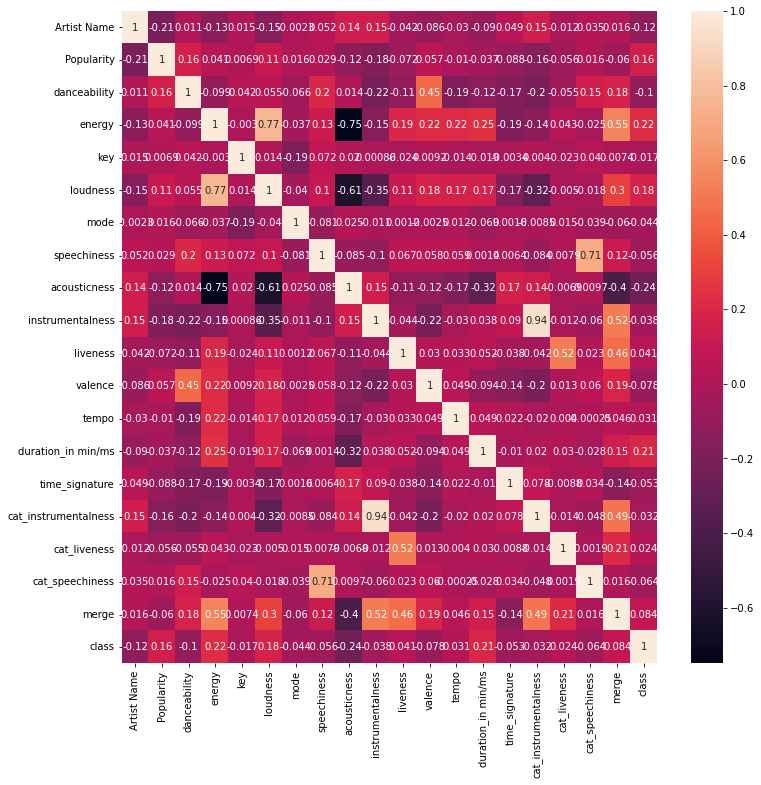

In [ ]:
corr = x_.corr(method='pearson')#'pearson', 'kendall', 'spearman'
top_features = corr.index
plt.figure(figsize=(12,12))
sns.heatmap(x_[top_features].corr(method='pearson'),annot=True)
plt.show()

In [ ]:
y_ = x_["class"]
x_.drop("class",axis=1,inplace=True)


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1 , test_size=0.25, random_state= 107)
for train_index, val_index in split.split(x_,y_):
  x_train = x_.iloc[train_index]
  y_train = y_.iloc[train_index]
  x_val = x_.iloc[val_index]
  y_val = y_.iloc[val_index]

In [ ]:
pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from lazypredict.Supervised import LazyClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier

In [ ]:
classifiers_list =[LGBMClassifier,XGBClassifier,RandomForestClassifier,ExtraTreesClassifier,SVC]
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifiers_list)#","XGBClassifier","RandomForestClassifier","BaggingClassifier","ExtraTreesClassifier","SVC"
models,predictions = clf.fit(x_train, x_val, y_train, y_val)

100%|██████████| 5/5 [00:46<00:00,  9.29s/it]


In [ ]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.55,0.59,None,0.54,8.59
XGBClassifier,0.55,0.59,None,0.53,20.65
RandomForestClassifier,0.52,0.57,None,0.51,4.21
SVC,0.53,0.54,None,0.50,11.07
ExtraTreesClassifier,0.51,0.54,None,0.50,1.93


In [ ]:
x_train["class"] = y_train
x_val["class"] = y_val

In [ ]:
#train_df = train_df[(train_df["Class"]==10) | (train_df["Class"]==6) |(train_df["Class"]==8)]
class_train = x_train["class"].copy()
class_val = x_val["class"].copy()
x_train["class"].iloc[(x_train["class"] != 10)]=0
x_train["class"].iloc[(x_train["class"] == 10)]=1
x_val["class"].iloc[(x_val["class"] != 10)]=0
x_val["class"].iloc[(x_val["class"] == 10)]=1

In [ ]:
print(class_train)
print(class_val)

8434      0
6752      5
11963     1
3760      6
12801    10
         ..
4836      9
13308     6
10654     5
7862      2
12138     7
Name: class, Length: 10797, dtype: int64
2560      9
6759      9
13717     3
10631     2
1831      2
         ..
1619     10
10075     7
5476     10
690       1
10827    10
Name: class, Length: 3599, dtype: int64


In [ ]:
y_train = x_train["class"]
x_train.drop("class",axis=1,inplace = True)
y_val = x_val["class"]
x_val.drop("class",axis=1,inplace = True)

In [ ]:
y_train.value_counts()

0    7828
1    2969
Name: class, dtype: int64

In [ ]:
y_train_ = y_train
x_train_ = x_train

In [ ]:
x_train_

,Artist Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
8434,0.51,-2.24,-1.66,-1.04,0.91,0.00,1.00,-0.59,0.83,0.00,0.65,-1.24,0.86,-1.25,1.00
6752,1.34,0.88,1.03,-0.30,0.09,1.05,1.00,1.79,-0.66,0.45,0.46,0.31,1.12,0.33,0.80
11963,-1.11,0.52,-0.12,1.78,1.00,1.72,0.00,1.36,-0.99,-0.88,1.18,-1.48,0.45,-1.02,0.80
3760,-0.16,-1.39,1.23,-1.04,0.73,-1.28,1.00,0.11,0.19,1.77,-1.45,2.11,1.75,-0.65,0.80
12801,-0.70,0.73,-1.01,1.73,1.00,1.09,0.00,0.50,-1.51,0.00,0.94,0.78,-0.74,0.32,0.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4836,-1.13,-1.39,0.10,-0.69,0.64,-0.08,0.00,-0.37,0.44,-0.93,-0.36,-1.13,0.12,0.08,0.80
13308,0.54,-1.61,-0.11,0.33,0.36,0.16,0.00,0.07,0.48,1.33,-1.52,0.82,-0.19,1.43,0.60
10654,-0.44,-1.61,1.65,-0.52,0.73,0.25,1.00,1.98,0.62,0.00,-0.55,0.83,-0.45,-0.80,0.80
7862,0.40,-0.88,0.13,-1.45,1.00,-1.10,1.00,-0.48,1.57,1.16,-0.53,0.34,-0.33,-0.65,0.80


In [ ]:
x_train_.columns

Index(['Artist Name', 'Popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_in min/ms', 'time_signature'],
      dtype='object')

In [ ]:
# Data augmentation
import imblearn
print(imblearn.__version__)

0.8.1


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
#oversample= SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
oversample= SMOTE()
x1 , y1 = oversample.fit_resample(x_train_,y_train_)

In [ ]:
x1.shape

(15656, 15)

In [ ]:
y1.value_counts()

0    7828
1    7828
Name: class, dtype: int64

In [ ]:
y_train_.value_counts()

0    7828
1    2969
Name: class, dtype: int64

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.multiclass import OneVsOneClassifier
LGBM_clf = LGBMClassifier()
y_train_pred = cross_val_predict(LGBM_clf,x_train_,y_train_,cv=3)
conf_mx = confusion_matrix(y_train_,y_train_pred)
conf_mx

array([[6954,  874],
       [1872, 1097]])

In [ ]:
y_proas_LGBM = cross_val_predict(LGBM_clf, x_train_,y_train_,cv=3,method="predict_proba")

In [ ]:
from sklearn.metrics import roc_curve
y_scores_LGBM = y_proas_LGBM [:,1]
fpr_LGBM , tpr_LGBM , thresholds_LGBM = roc_curve(y_train_,y_scores_LGBM)

In [ ]:
def plot_roc_curve(fpr,tpr,label=None):
  fig = plt.Figure(figsize=(10,5))
  ax = fig.add_axes([0,0,1,1])
  ax.plot(fpr,tpr,linewidth=2,label=label)
  ax.plot([0,1],[0,1],"k--")
  ax.grid(True)
  ax.legend()
  return fig

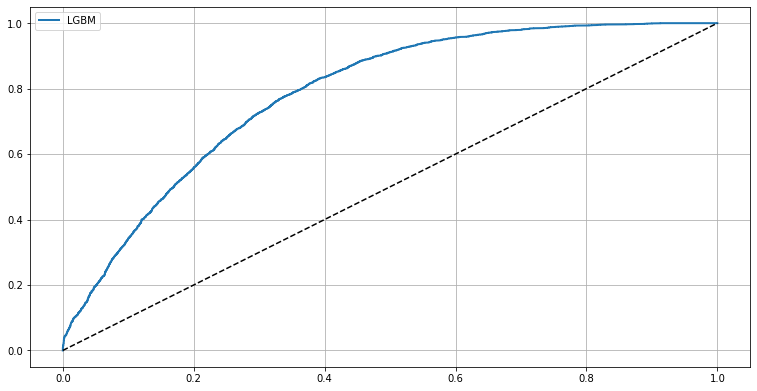

In [ ]:
fig = plot_roc_curve(fpr_LGBM , tpr_LGBM,"LGBM")
fig

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_,y_scores_LGBM)

0.7847423073686137

In [ ]:
y_scores_LGBM

array([0.00779064, 0.02196347, 0.52262469, ..., 0.00259087, 0.04528707,
       0.00324165])

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions_LGBM, recalls_LGBM, thresholdes_pr_LGBM = precision_recall_curve(y_train_, y_scores_LGBM)

In [ ]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
  fig = plt.Figure(figsize= (10,5))
  ax = fig.add_axes([0,0,1,1])
  ax.plot(thresholds, precisions[:-1], "b--", label = "Precision")
  ax.plot(thresholds, recalls[:-1], "g-", label = "Recall")
  ax.grid(True)
  ax.legend()
  return fig

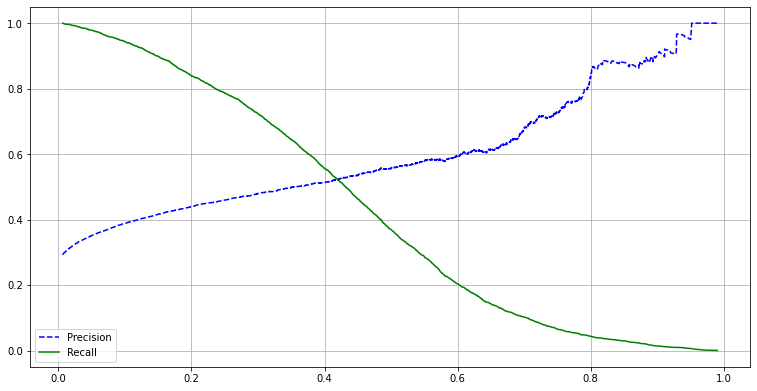

In [ ]:
plot_precision_recall_vs_threshold(precisions_LGBM,recalls_LGBM,thresholdes_pr_LGBM)

In [ ]:
thresholds_55_f1 = thresholdes_pr_LGBM[np.argmax(precisions_LGBM >= 0.52)]
y_train_pred_55 = (y_scores_LGBM>= thresholds_55_f1)

In [ ]:
from sklearn.metrics import precision_score , recall_score , f1_score
print(precision_score(y_train_,y_train_pred_55))
print(recall_score(y_train_,y_train_pred_55))
print(f1_score(y_train_,y_train_pred_55))

0.5200525969756739
0.5328393398450657
0.5263683247379805


In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.multiclass import OneVsOneClassifier
LGBM_clf = LGBMClassifier()
y_train_pred = cross_val_predict(LGBM_clf,x1,y1,cv=3)
conf_mx = confusion_matrix(y1,y_train_pred)
conf_mx

array([[6429, 1399],
       [2436, 5392]])

In [ ]:
row_sums = conf_mx.sum(axis= 1 , keepdims=True)
norm_conf_mx = conf_mx/row_sums

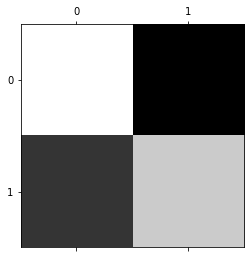

In [ ]:
#np.fill_diagonal(norm_conf_mx,0)
plt.Figure(figsize=(10,10))
plt.matshow(norm_conf_mx,cmap= plt.cm.gray)
plt.show()

In [ ]:
pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from lazypredict.Supervised import LazyClassifier
from sklearn.svm import SVC

In [ ]:
LGBM_clf = LGBMClassifier()
LGBM_clf.fit(x_train_, y_train_)
y_pred = LGBM_clf.predict(x_val)
from sklearn.metrics import f1_score
f1_score(y_val, y_pred, average='weighted')

0.7279569937988454

with augmentation

In [ ]:
LGBM_clf = LGBMClassifier()
LGBM_clf.fit(x1, y1)
y_pred = LGBM_clf.predict(x_val)
from sklearn.metrics import f1_score
f1_score(y_val, y_pred, average='weighted')

0.7384716460648729

other classes

In [ ]:
x_train["class"] = class_train
x_train = x_train[x_train["class"]<10]
x_train

,Artist Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,class
8434,0.51,-2.24,-1.66,-1.04,0.91,0.00,1.00,-0.59,0.83,0.00,0.65,-1.24,0.86,-1.25,1.00,0
6752,1.34,0.88,1.03,-0.30,0.09,1.05,1.00,1.79,-0.66,0.45,0.46,0.31,1.12,0.33,0.80,5
11963,-1.11,0.52,-0.12,1.78,1.00,1.72,0.00,1.36,-0.99,-0.88,1.18,-1.48,0.45,-1.02,0.80,1
3760,-0.16,-1.39,1.23,-1.04,0.73,-1.28,1.00,0.11,0.19,1.77,-1.45,2.11,1.75,-0.65,0.80,6
4118,-1.13,0.10,1.23,-0.72,0.36,-1.00,1.00,-0.39,0.58,0.00,0.43,1.13,-0.83,-2.04,0.80,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4836,-1.13,-1.39,0.10,-0.69,0.64,-0.08,0.00,-0.37,0.44,-0.93,-0.36,-1.13,0.12,0.08,0.80,9
13308,0.54,-1.61,-0.11,0.33,0.36,0.16,0.00,0.07,0.48,1.33,-1.52,0.82,-0.19,1.43,0.60,6
10654,-0.44,-1.61,1.65,-0.52,0.73,0.25,1.00,1.98,0.62,0.00,-0.55,0.83,-0.45,-0.80,0.80,5
7862,0.40,-0.88,0.13,-1.45,1.00,-1.10,1.00,-0.48,1.57,1.16,-0.53,0.34,-0.33,-0.65,0.80,2


In [ ]:
x_val["class"] = class_val
x_val["p_class"] = y_pred
x_val

,Artist Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,class,p_class
2560,-0.06,0.37,0.19,-1.20,0.36,-0.26,1.00,0.59,1.03,0.00,-0.94,-0.27,0.53,0.06,0.80,9,0
6759,1.34,2.65,1.25,1.01,0.55,1.88,0.00,0.96,-0.70,-0.93,0.43,0.62,0.25,-0.40,0.80,9,0
13717,-0.07,0.10,-0.87,-1.17,0.36,-1.21,0.00,-1.17,0.79,-1.01,0.16,0.53,0.70,-1.13,0.80,3,0
10631,0.15,0.02,0.76,-1.31,0.55,-0.31,1.00,-0.67,1.33,-1.03,-1.66,0.73,-0.75,-0.26,0.80,2,0
1831,1.22,0.16,1.07,-1.35,0.73,-0.25,1.00,-0.44,0.98,-0.41,-1.09,0.39,-0.60,-0.58,0.80,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1619,1.19,1.03,1.25,0.31,0.73,1.04,1.00,-0.45,-1.01,0.00,-0.36,0.38,0.14,-0.87,0.80,10,0
10075,0.39,0.10,-0.47,-1.77,0.18,-1.54,1.00,-0.09,2.46,2.58,-0.12,-0.58,0.23,-2.08,0.60,7,0
5476,-0.78,0.62,-0.66,0.20,0.82,-0.39,1.00,0.96,-0.47,-0.55,1.78,-0.43,0.07,0.71,0.80,10,1
690,1.06,-0.07,2.00,-0.77,0.45,-1.11,0.00,1.20,0.32,-0.78,-0.63,0.31,0.75,0.44,0.80,1,0


In [ ]:
x_val["p_class"].value_counts()

0    2650
1     949
Name: p_class, dtype: int64

In [ ]:
x_val = x_val[x_val["p_class"]==0]
x_val

,Artist Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,class,p_class
2560,-0.06,0.37,0.19,-1.20,0.36,-0.26,1.00,0.59,1.03,0.00,-0.94,-0.27,0.53,0.06,0.80,9,0
6759,1.34,2.65,1.25,1.01,0.55,1.88,0.00,0.96,-0.70,-0.93,0.43,0.62,0.25,-0.40,0.80,9,0
13717,-0.07,0.10,-0.87,-1.17,0.36,-1.21,0.00,-1.17,0.79,-1.01,0.16,0.53,0.70,-1.13,0.80,3,0
10631,0.15,0.02,0.76,-1.31,0.55,-0.31,1.00,-0.67,1.33,-1.03,-1.66,0.73,-0.75,-0.26,0.80,2,0
1831,1.22,0.16,1.07,-1.35,0.73,-0.25,1.00,-0.44,0.98,-0.41,-1.09,0.39,-0.60,-0.58,0.80,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,0.17,-0.99,-1.59,-3.11,0.09,-2.81,1.00,-0.28,2.75,2.43,-0.39,-2.65,-2.39,0.65,1.00,6,0
1619,1.19,1.03,1.25,0.31,0.73,1.04,1.00,-0.45,-1.01,0.00,-0.36,0.38,0.14,-0.87,0.80,10,0
10075,0.39,0.10,-0.47,-1.77,0.18,-1.54,1.00,-0.09,2.46,2.58,-0.12,-0.58,0.23,-2.08,0.60,7,0
690,1.06,-0.07,2.00,-0.77,0.45,-1.11,0.00,1.20,0.32,-0.78,-0.63,0.31,0.75,0.44,0.80,1,0


In [ ]:
y_train2 = x_train["class"]
y_val2 = x_val["class"]
x_train.drop("class",axis=1,inplace=True)
x_val.drop(["class","p_class"],axis=1,inplace=True)

In [ ]:
y_train2.value_counts()

6    1552
9    1514
8    1112
5     868
1     823
2     763
0     375
7     346
3     242
4     233
Name: class, dtype: int64

In [ ]:
y_val2.value_counts()

10    488
9     456
6     393
5     278
8     265
2     200
1     176
0     124
7     115
3      80
4      75
Name: class, dtype: int64

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.multiclass import OneVsOneClassifier
LGBM_clf = LGBMClassifier()
y_train_pred = cross_val_predict(LGBM_clf,x_train,y_train2,cv=3)
conf_mx = confusion_matrix(y_train2,y_train_pred)
conf_mx

array([[309,   0,   0,  15,  26,   0,   0,  13,   0,  12],
       [  0, 101,  49,   0,   0,  37, 438,   0, 102,  96],
       [  1,  34, 431,   0,   0,  14, 179,   0,  26,  78],
       [ 33,   0,   0, 184,  13,   0,   0,   5,   0,   7],
       [ 46,   0,   0,   2, 172,   0,   0,   1,   0,  12],
       [  0,  10,  17,   0,   0, 623,  59,   0,   3, 156],
       [  2, 244, 109,   0,   0,  56, 811,   0, 154, 176],
       [ 12,   1,   0,   4,   1,   0,   1, 327,   0,   0],
       [  1,  37,  14,   0,   0,   1, 166,   0, 870,  23],
       [ 20,  36,  61,   3,  15, 146, 244,   0,  28, 961]])

In [ ]:
row_sums = conf_mx.sum(axis= 1 , keepdims=True)
norm_conf_mx = conf_mx/row_sums

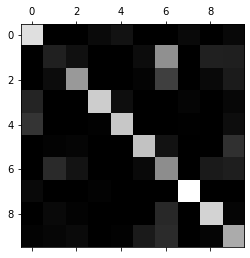

In [ ]:
#np.fill_diagonal(norm_conf_mx,0)
plt.Figure(figsize=(10,10))
plt.matshow(norm_conf_mx,cmap= plt.cm.gray)
plt.show()

In [ ]:
LGBM_clf = LGBMClassifier()
LGBM_clf.fit(x_train, y_train2)
y_pred2 = LGBM_clf.predict(x_val)
from sklearn.metrics import f1_score
f1_score(y_val2, y_pred2, average='weighted')

0.47678883737238

In [ ]:
display(y_val2)

2560      9
6759      9
13717     3
10631     2
1831      2
         ..
751       6
1619     10
10075     7
690       1
10827    10
Name: class, Length: 2650, dtype: int64

In [ ]:
res_ = pd.DataFrame(columns=["y2"])
res_["y2"] = y_val2

In [ ]:
res_["y2_"] = y_pred2

In [ ]:
res_

,y2,y2_
2560,9,9
6759,9,9
13717,3,3
10631,2,2
1831,2,2
...,...,...
751,6,6
1619,10,9
10075,7,7
690,1,5


In [ ]:
res_[res_["y2"]==res_["y2_"]]

,y2,y2_
2560,9,9
6759,9,9
13717,3,3
10631,2,2
1831,2,2
...,...,...
8816,9,9
261,9,9
10472,9,9
751,6,6


In [ ]:
res_.iloc[(res_.index==1619)]

,y2,y2_
1619,10,9


In [ ]:
res_2 = pd.DataFrame(columns=["y1"])
res_2["y1_"] = class_val

In [ ]:
res_2["y1_"] = y_pred

In [ ]:
res_2 = res_2.applymap(lambda x: 10 if x == 1 else 100)
res_2["y1"] = class_val

In [ ]:
res_2

,y1,y1_
2560,9,100
6759,9,100
13717,3,100
10631,2,100
1831,2,100
...,...,...
1619,10,100
10075,7,100
5476,10,10
690,1,100


In [ ]:
res_2 = res_2[res_2["y1_"]==10]

In [ ]:
res_2.iloc[(res_2.index==1619)]

,y1,y1_


In [ ]:
final_res = pd.concat([res_2, res_])
final_res.fillna(0,inplace=True)
final_res["true"] = final_res["y1"]+final_res["y2"]
final_res["res"] = final_res["y1_"]+final_res["y2_"]
final_res.drop(["y1","y2","y1_","y2_"],axis=1,inplace=True)
final_res

,true,res
8950,2.00,10.00
8260,6.00,10.00
13181,10.00,10.00
1248,8.00,10.00
13870,8.00,10.00
...,...,...
751,6.00,6.00
1619,10.00,9.00
10075,7.00,7.00
690,1.00,5.00


In [ ]:
final_res.iloc[(final_res.index==13717)]

,true,res
13717,3.00,3.00


In [ ]:
f1_score(final_res["true"],final_res["res"], average='weighted')

0.5223459796325408